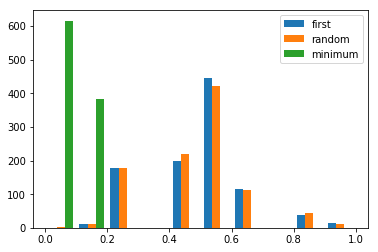

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#experiment on flipping different fair coins. Outputs are the first coin, random coin, and the minimum coin
def experiment(num_coin, num_flip):
    outcome = np.random.choice((0,1), size = (num_flip, num_coin))
    heads = np.sum(outcome, axis = 0)
    p_heads = heads/10
    return p_heads[0], np.random.choice(p_heads), np.min(p_heads)

#set number of coins to 1000, number of flip of each coin to 10, number of experiment to 1000
num_coin = 1000
num_flip = 10
num_experiment = 1000

results = np.zeros((num_experiment, 3))

#doing the experiment
for i in range(num_experiment):
    first, random, minimum = experiment(num_coin, num_flip)
    results[i, 0] = first
    results[i, 1] = random
    results[i, 2] = minimum

#plot the histgram graph
plt.hist(results, bins = 10, label = ["first", "random", "minimum"])
plt.legend()
plt.show()

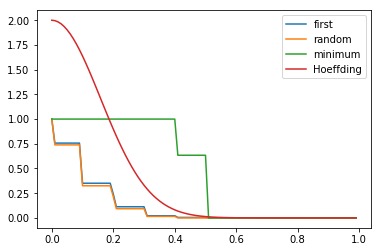

In [2]:
#expected chance of getting head is 0.5
mu = 0.5

#Hoeffding inequality
def hoeffding(epsilon, N):
    return 2 * np.exp(-2 * epsilon *epsilon * N)

epsilons = np.empty(100)

est = np.empty([100, 3])    

#create epsilon and estimator
for i in range(100):
    epsilons[i] = i/100
    est[i] = np.mean((abs(results-mu) >= epsilons[i]), axis = 0)
P_hoeffding = [hoeffding(epsilon, num_flip) for epsilon in epsilons]
#plot the graph
plt.plot(epsilons, est[:,0], label = "first")
plt.plot(epsilons, est[:,1], label = "random")
plt.plot(epsilons, est[:,2], label = "minimum")
plt.plot(epsilons, P_hoeffding, label = "Hoeffding")
plt.legend()
plt.show()